# Comparison of several PMP and CNN

### modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### options

In [2]:
%reload_ext autoreload
%autoreload 2
dir_data = '../data/power_consumption/'
plt.style.use(['dark_background'])

### data

In [3]:
rmse_dpm = np.load(dir_data+'rmse/rmse_dpm.npy')
rmse_wpm = np.load(dir_data+'rmse/rmse_wpm.npy')
rmse_ypm = np.load(dir_data+'rmse/rmse_ypm.npy')
rmse_ptm = np.load(dir_data+'rmse/rmse_ptm.npy')
rmse_ptu = np.load(dir_data+'rmse/rmse_ptu.npy')
rmse_tfm = np.load(dir_data+'rmse/rmse_tfm.npy')
rmse_tfu = np.load(dir_data+'rmse/rmse_tfu.npy')
# and others

In [4]:
# get n input days
train_Xu = np.load(dir_data+'train_Xu.npy')
n_timesteps = train_Xu.shape[1]

### create ensemble

In [5]:
rmse_ensemble_all = np.mean([rmse_dpm, rmse_wpm, rmse_ypm, rmse_ptm, rmse_ptu, rmse_tfm, rmse_tfu], axis=0)
rmse_ensemble_pmp = np.mean([rmse_dpm, rmse_wpm, rmse_ypm], axis=0)
rmse_ensemble_cnn = np.mean([rmse_ptm, rmse_ptu, rmse_tfm, rmse_tfu], axis=0)

## Plotting

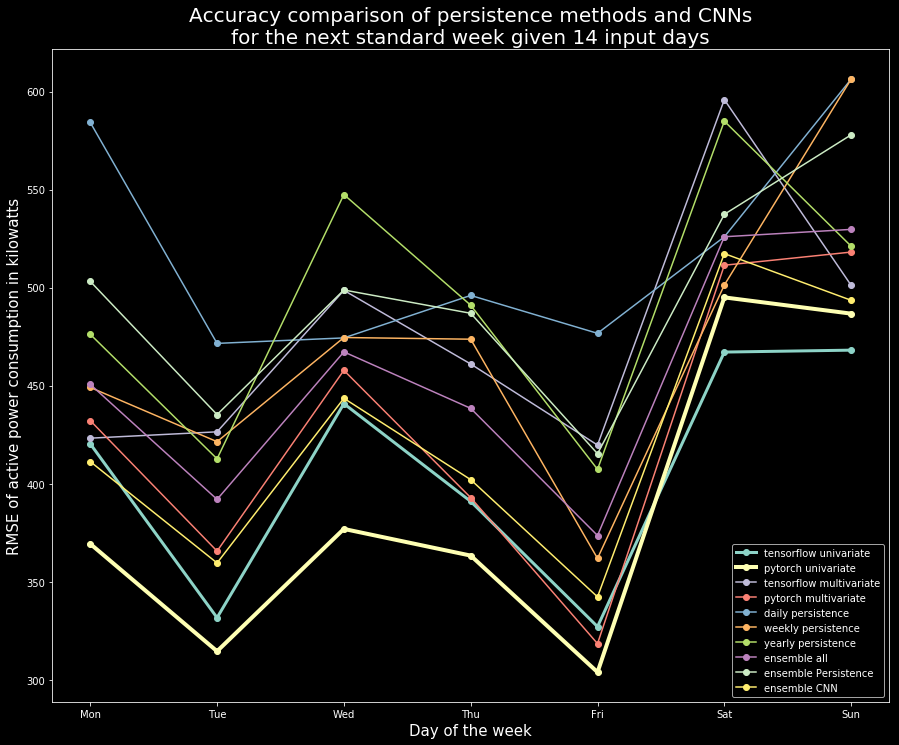

In [6]:
# plot scores
plt.figure(figsize=(15, 12))
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.plot(days, rmse_tfu, marker='o', label='tensorflow univariate', linewidth=3)
plt.plot(days, rmse_ptu, marker='o', label='pytorch univariate', linewidth=4)
plt.plot(days, rmse_tfm, marker='o', label='tensorflow multivariate')
plt.plot(days, rmse_ptm, marker='o', label='pytorch multivariate')
plt.plot(days, rmse_dpm, marker='o', label='daily persistence')
plt.plot(days, rmse_wpm, marker='o', label='weekly persistence')
plt.plot(days, rmse_ypm, marker='o', label='yearly persistence')
plt.plot(days, rmse_ensemble_all, marker='o', label='ensemble all')
plt.plot(days, rmse_ensemble_pmp, marker='o', label='ensemble Persistence')
plt.plot(days, rmse_ensemble_cnn, marker='o', label='ensemble CNN')
plt.legend()
plt.title('Accuracy comparison of persistence methods and CNNs'+'\n'+
'for the next standard week given %s input days' %  n_timesteps,
          fontdict={'fontsize': 20})
plt.ylabel('RMSE of active power consumption in kilowatts',
           fontdict={'fontsize': 15})
plt.xlabel('Day of the week',
          fontdict={'fontsize': 15})
plt.savefig('plots/overall_comparison.png')
plt.show()